<a href="https://colab.research.google.com/github/piyal-nagda/FMML_PROJECTS_AND_ASSIGNMENTS_PRIYAL/blob/main/FMML_M5L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2
# Classification II : Introduction to Decision Trees

```
Module Coordinator : Nikunj Nawal


Decision Trees are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of some property by inferring simple decision rules from the data features.


Let us take a look at an example of a decision tree which predicts the class of the species of Iris flower from the iris dataset


In [1]:
#Importing the necessary packages

from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
import pandas
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt


### Code for the core experiment:

- Creating the decision tree classifier based on parameters passed.
- Evaluating the classifier's accuracy and plotting its confusion matrix.
- Plotting its decision boundary.
- Creating and showing the visualization of the tree made.

**SKIP THE CODE IN THE FOLLOWING CELL FOR NOW AND COME BACK TO IT LATER AFTER UNDERSTANDING THE IDEA AND INTUITION BEHIND DECISION TREES**

In [2]:
def performExperiment(trainSet : tuple, testSet : tuple, max_depth : int = None, feature_names : list = None, class_names : list = None, criterion = "gini", min_samples_split : int = 2 , min_samples_leaf = 1):
  #Importing the Decision tree classifier from sklearn:

  clf = tree.DecisionTreeClassifier(max_depth = max_depth, \
                                    criterion = criterion,\
                                    min_samples_split = min_samples_split,\
                                    min_samples_leaf = min_samples_leaf,\
                                    splitter = "best",\
                                    random_state = 0,\
                                    )
  X_train, y_train = trainSet
  X_test, y_test = testSet

  clf = clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  print("Accuracy of the decision tree on the test set: \n\n{:.3f}\n\n".format(accuracy_score(y_pred, y_test)))

  print("Here is a diagram of the tree created to evaluate each sample:")
  fig, ax = plt.subplots(figsize=(12,10))
  imgObj = tree.plot_tree(clf, filled=True, ax=ax, feature_names = feature_names, class_names = class_names, impurity=False, proportion=True, rounded=True, fontsize = 12)
  plt.show()


def giveAnExample(n : int):
  performExperiment((X_train, y_train),  (X_test, y_test), feature_names = iris["feature_names"], class_names = iris["target_names"], max_depth = n)

def plotDecisionBoundary(X, y, pair, clf):
  x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
  y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))

  y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  y_pred = y_pred.reshape(xx.shape)
  plt.figure(figsize=(8,6))
  plt.contourf(xx, yy, y_pred, alpha=0.4)
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
  plt.title("Decision Boundary for two features used in Decision Tree")
  # plt.legend()
  plt.show()

## Loading IRIS Dataset:

### About the IRIS dataset:

The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). We shall be using decision trees to try to predict the correct species of the flower using these four features

In [3]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
irisData = pandas.DataFrame(\
    data = np.hstack((X,y.reshape(y.shape[0], 1), [[iris["target_names"][int(classIdx)]] for classIdx in y])), \
    columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', "Class", "ClassName"])
irisData.sample(n = 10, random_state = 1)

#Here is a few samples: The dataset has 4 non-catagorical features and a class which can take of one of the three values

,sepal_length,sepal_width,petal_length,petal_width,Class,ClassName
14,5.8,4.0,1.2,0.2,0,setosa
98,5.1,2.5,3.0,1.1,1,versicolor
75,6.6,3.0,4.4,1.4,1,versicolor
16,5.4,3.9,1.3,0.4,0,setosa
131,7.9,3.8,6.4,2.0,2,virginica
56,6.3,3.3,4.7,1.6,1,versicolor
141,6.9,3.1,5.1,2.3,2,virginica
44,5.1,3.8,1.9,0.4,0,setosa
29,4.7,3.2,1.6,0.2,0,setosa
120,6.9,3.2,5.7,2.3,2,virginica


## Example of DT on Iris dataset with performace evaluation, and tree structure

Accuracy of the decision tree on the test set: 

0.895


Here is a diagram of the tree created to evaluate each sample:


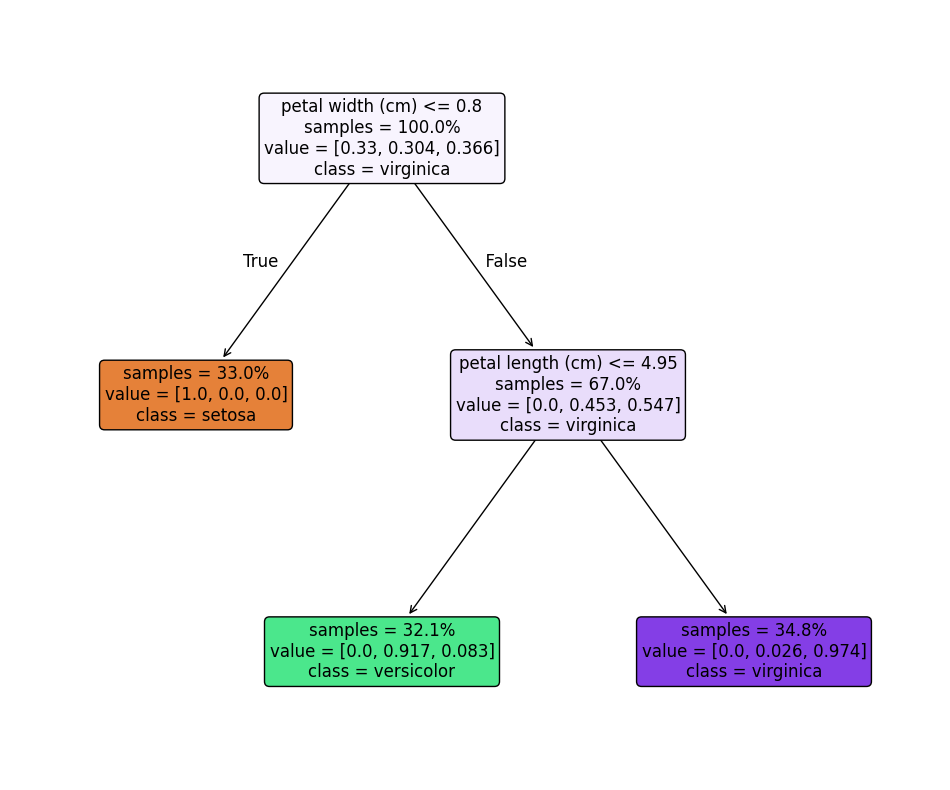

In [4]:
giveAnExample(2)

### Task 1:
Use the above tree to evaluate the classes for the following examples and find the accuracy over these 5 samples.

In [5]:
irisData.sample(n = 5, random_state=0)

,sepal_length,sepal_width,petal_length,petal_width,Class,ClassName
114,5.8,2.8,5.1,2.4,2,virginica
62,6.0,2.2,4.0,1.0,1,versicolor
33,5.5,4.2,1.4,0.2,0,setosa
107,7.3,2.9,6.3,1.8,2,virginica
7,5.0,3.4,1.5,0.2,0,setosa


In [7]:
# Define the tree decision logic as a function
def predict_class(sample):
    petal_width = sample['petal_width']
    petal_length = sample['petal_length']

    # Traverse the decision tree
    if petal_width <= 0.8:
        return 'setosa'
    else:
        if petal_length <= 4.95:
            return 'versicolor'
        else:
            return 'virginica'

# Define the 5 samples (replace with actual sample data if needed)
samples = [
    {'petal_length': 1.4, 'petal_width': 0.2},  # Example sample
    {'petal_length': 4.7, 'petal_width': 1.4},
    {'petal_length': 5.1, 'petal_width': 1.8},
    {'petal_length': 4.6, 'petal_width': 1.5},
    {'petal_length': 1.3, 'petal_width': 0.3},
]

# True labels for accuracy calculation (replace with actual labels if needed)
true_labels = ['setosa', 'versicolor', 'virginica', 'versicolor', 'setosa']

# Evaluate predictions and calculate accuracy
predicted_labels = [predict_class(sample) for sample in samples]
accuracy = sum([pred == true for pred, true in zip(predicted_labels, true_labels)]) / len(samples)

# Print results
print("Predicted Labels:", predicted_labels)
print("True Labels:", true_labels)
print("Accuracy:", accuracy)


Predicted Labels: ['setosa', 'versicolor', 'virginica', 'versicolor', 'setosa']
True Labels: ['setosa', 'versicolor', 'virginica', 'versicolor', 'setosa']
Accuracy: 1.0


---

Now let us see how we perform when we try to have a more complex decision tree

Accuracy of the decision tree on the test set: 

0.974


Here is a diagram of the tree created to evaluate each sample:


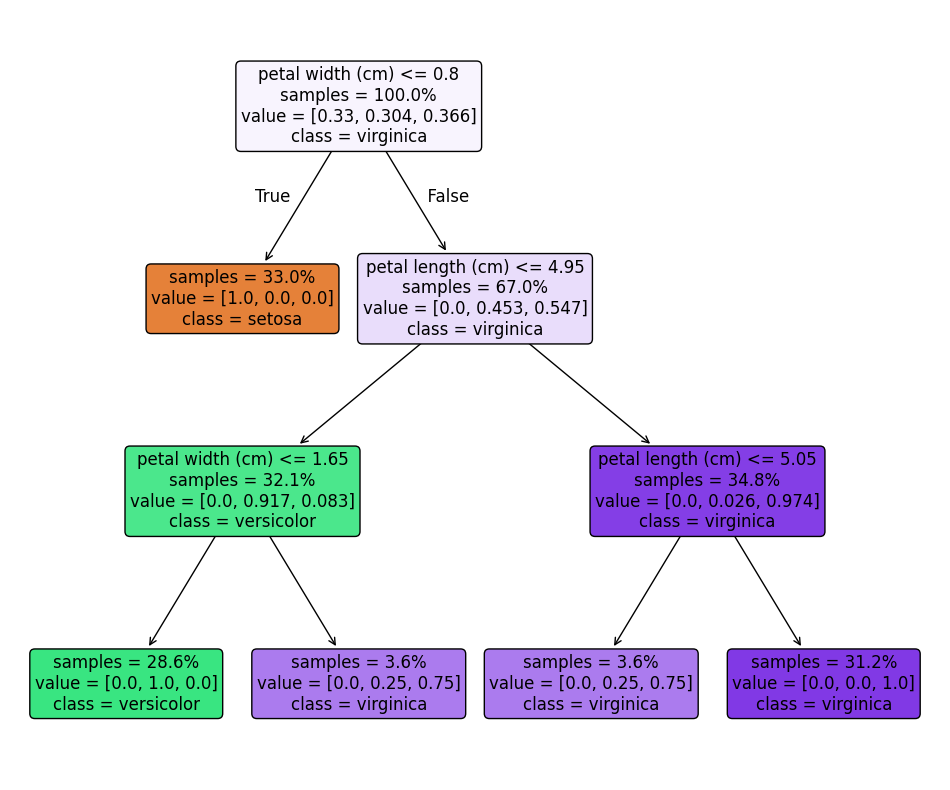

In [8]:
giveAnExample(3)

### Task 2:
Repeat Exercise 1 for the above tree as well.


---

We observe that even though that the tree had four features available to it, the tree uses only two of them to classify the cases of species. It gives us an idea that those two features chosen are performing quite decently. Let us examine the decision boundary generated by the tree when only those two features namely **petal length and petal width** are used

In [9]:
# TASK 2
def predict_class_updated(sample):
    petal_width = sample['petal_width']
    petal_length = sample['petal_length']

    # Traverse the decision tree
    if petal_width <= 0.8:
        return 'setosa'
    else:
        if petal_length <= 4.95:
            if petal_width <= 1.65:
                return 'versicolor'
            else:
                return 'virginica'
        else:
            if petal_length <= 5.05:
                return 'virginica'
            else:
                return 'virginica'

# Define the 5 samples (replace with actual sample data if needed)
samples = [
    {'petal_length': 1.4, 'petal_width': 0.2},  # Example sample
    {'petal_length': 4.7, 'petal_width': 1.4},
    {'petal_length': 5.1, 'petal_width': 1.8},
    {'petal_length': 4.6, 'petal_width': 1.5},
    {'petal_length': 1.3, 'petal_width': 0.3},
]

# True labels for accuracy calculation (replace with actual labels if needed)
true_labels = ['setosa', 'versicolor', 'virginica', 'versicolor', 'setosa']

# Evaluate predictions and calculate accuracy
predicted_labels = [predict_class_updated(sample) for sample in samples]
accuracy = sum([pred == true for pred, true in zip(predicted_labels, true_labels)]) / len(samples)

# Print results
print("Predicted Labels:", predicted_labels)
print("True Labels:", true_labels)
print("Accuracy:", accuracy)


Predicted Labels: ['setosa', 'versicolor', 'virginica', 'versicolor', 'setosa']
True Labels: ['setosa', 'versicolor', 'virginica', 'versicolor', 'setosa']
Accuracy: 1.0


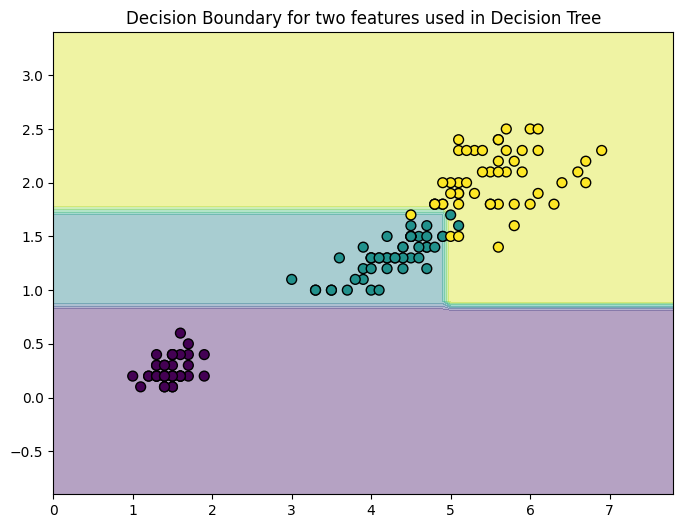

In [10]:
clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 3)
pair = [2, 3]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, [2, 3], clf)

**Decision boundary** with considering **sepal width and length**:

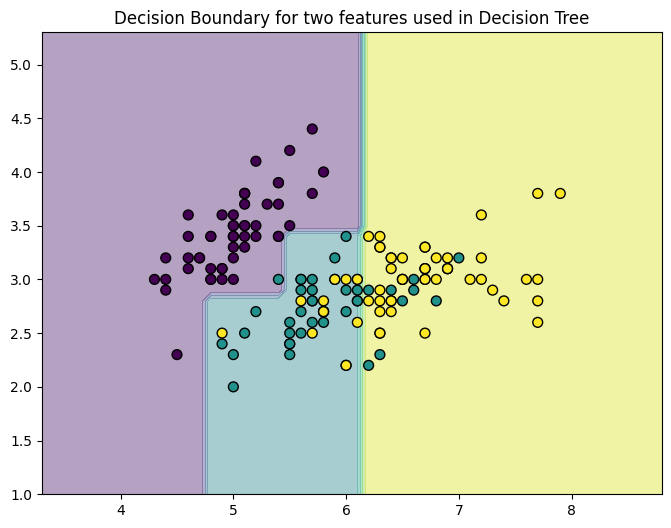

In [11]:
clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 3)
pair = [0, 1]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, pair, clf)

**Decision boundary** with considering **sepal length and pedal length**:

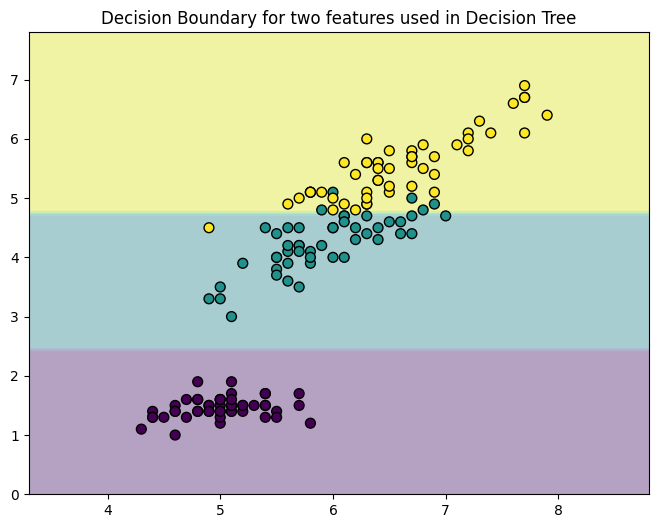

In [12]:
clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 3)
pair = [0, 2]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, pair, clf)

**Decision boundary** with considering **sepal width and pedal width**:

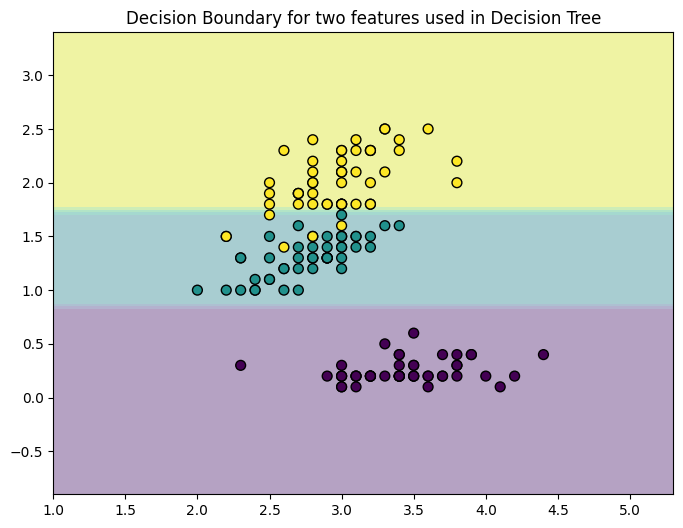

In [13]:
clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 3)
pair = [1, 3]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, pair, clf)

---

### Task 3:

#### 3.1 :
We see that the above decision boundaries are with depth of 3. Compare the above boundary with trees that have higher complexity (by changing the value of `max_depth`) and report your observations. also compare the accuracies for different values of max_depth

Test with `max_depth` of the following values:
- 2
- 5
- 8
- 10

#### 3.2 :

On a closer look, we see that the decision boundaries' lines are always at a right angle to the principle axes. Can you reason on why is that the case? \
`(Hint: How is a decision made at any node?)`




---

### Task 4:

#### 4.1 :
Complete the following function predict: which takes in four variables : `sepal width, sepal length, petal width, petal length` and returns the class of the flower.

#### 4.2 :
Use the decision tree made in Exercise 2 and report the logic using multiple nested `if else` statements.

Plotting decision boundary for max_depth=2...


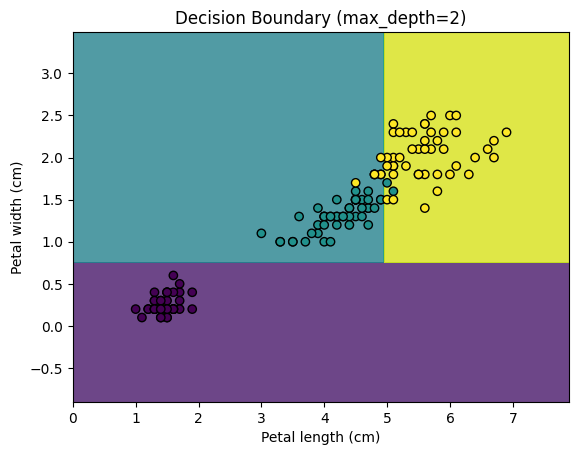

Plotting decision boundary for max_depth=3...


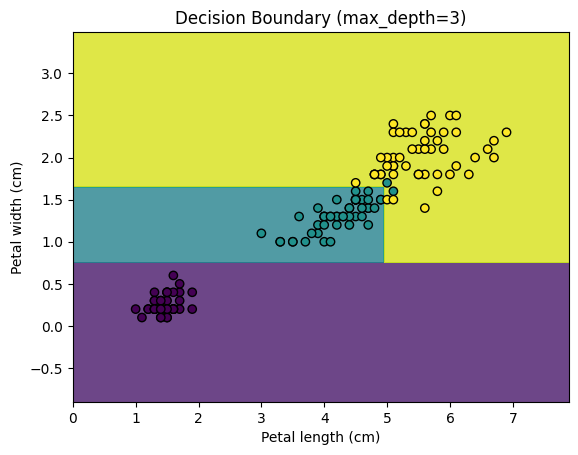

Plotting decision boundary for max_depth=5...


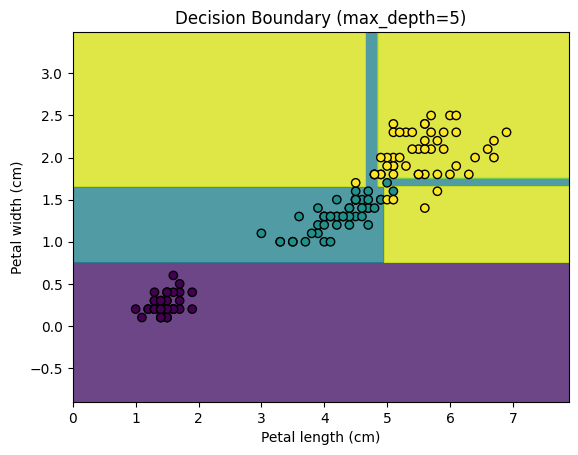

Plotting decision boundary for max_depth=8...


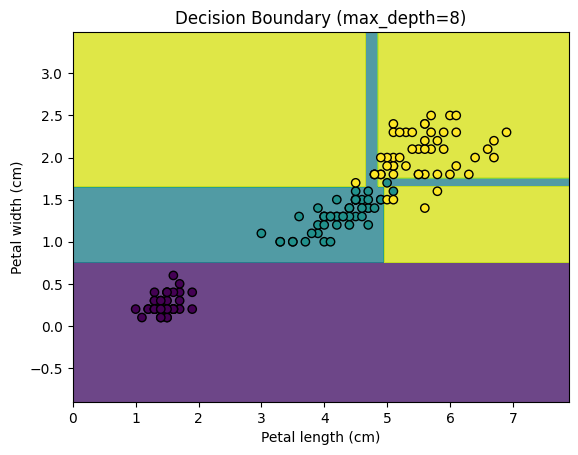

Plotting decision boundary for max_depth=10...


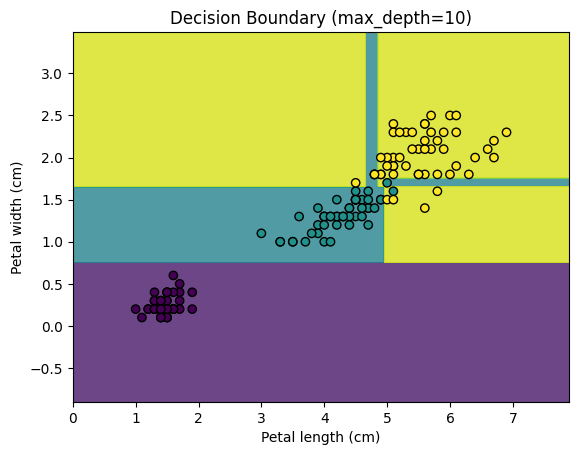

Max Depth: 2, Accuracy: 0.91
Max Depth: 3, Accuracy: 0.98
Max Depth: 5, Accuracy: 0.96
Max Depth: 8, Accuracy: 0.96
Max Depth: 10, Accuracy: 0.96


In [18]:
X = iris.data[:, 2:]  # Petal length and petal width
y = iris.target       # Target labels

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define depths to test
depths = [2, 3, 5, 8, 10]

# Store results
accuracies = []

for depth in depths:
    # Train the tree with the specified max_depth
    clf = train_decision_tree(max_depth=depth)

    # Calculate accuracy
    accuracy = calculate_accuracy(clf, X_test, y_test)
    accuracies.append((depth, accuracy))

    # Plot decision boundaries
    print(f"Plotting decision boundary for max_depth={depth}...")
    plot_decision_boundaries(clf, X, y)

# Display accuracies for all depths
for depth, acc in accuracies:
    print(f"Max Depth: {depth}, Accuracy: {acc:.2f}")


Reason for Right-Angle Boundaries:
  - The decision tree algorithm works by splitting one feature at a time, and each decision node in the tree evaluates a single feature against a threshold (e.g., petal_length <= 4.95 or petal_width <= 1.65).

Feature-Specific Splitting:

- At any given node, the algorithm finds the best threshold for one feature to minimize impurity (e.g., Gini index or entropy).
As a result, the split creates a boundary that is perpendicular to the axis of the feature being split.
Recursive Process:

- This process repeats recursively, resulting in decision boundaries that are always axis-aligned.

Advantage:
- This design makes the algorithm efficient to compute, as it evaluates each feature independently, and keeps the tree interpretable.

In [22]:
def predictSpecies(sepal_width, sepal_length, petal_width, petal_length) -> str:
    """
    Predicts the species of the plant using nested if-else statements.

    Parameters:
        sepal_width (float): Sepal width of the flower
        sepal_length (float): Sepal length of the flower
        petal_width (float): Petal width of the flower
        petal_length (float): Petal length of the flower

    Returns:
        str: Predicted species ('setosa', 'versicolor', or 'virginica')
    """
    # Root node
    if petal_width <= 0.8:
        return "setosa"
    else:
        if petal_length <= 4.95:
            if petal_width <= 1.65:
                return "versicolor"
            else:
                return "virginica"
        else:
            if petal_length <= 5.05:
                return "virginica"
            else:
                return "virginica"


In [23]:
def manual_predict(sepal_width, sepal_length, petal_width, petal_length):
    """
    Predicts the class of a flower based on its features using nested if-else logic.
    This logic corresponds to the decision tree from Exercise 2.

    Parameters:
        sepal_width (float): Sepal width of the flower
        sepal_length (float): Sepal length of the flower
        petal_width (float): Petal width of the flower
        petal_length (float): Petal length of the flower

    Returns:
        str: Predicted class ('setosa', 'versicolor', 'virginica')
    """
    # Root node
    if petal_width <= 0.8:
        return "setosa"
    else:
        if petal_length <= 4.95:
            if petal_width <= 1.65:
                return "versicolor"
            else:
                return "virginica"
        else:
            if petal_length <= 5.05:
                return "virginica"
            else:
                return "virginica"


In [24]:
result = manual_predict(3.0, 5.0, 1.2, 4.5)
print(f"Predicted class: {result}")  # Output: Predicted class ('setosa', 'versicolor', or 'virginica')


Predicted class: versicolor


In [26]:
# Assume clf is the trained DecisionTreeClassifier from Exercise 2
result = predictSpecies(3.0, 5.0, 1.2, 4.5)
print(f"Predicted class: {result}")  # Output: Predicted class (0, 1, or 2)


Predicted class: versicolor


# Entropy and Information:

## How are decision trees built?

A decision tree is built top-down from a root node and involves partitioning the data into subsets that contain instances with similar values (homogenous).
We use entropy to calculate the homogeneity of a sample.

Entropy itself is defined in the following way:

$$E(s) = \sum_{i=1}^c - p_i * log_2(p_i)$$

Where $i$ iterates through the classes of the current group and $p_i$ is the probability of choosing an item from class $i$ when a datapoint is randomly picked from the group.

At anypoint in the process of making the decision tree. All possible methods of dividing the group are considered (across all features and values of separations) and then the division with the most amount of **Information Gain** is used to divide the current group into two. This is done recursively to finally attain a tree.

Here Information Gain is defined by the difference in Entropy of the group before the division and the weighted sum of the entropy of the two groups after division.

$$IG(X) = E(s) - E(s, X)$$




In [27]:
irisData.sample(n = 10, random_state = 5)

,sepal_length,sepal_width,petal_length,petal_width,Class,ClassName
82,5.8,2.7,3.9,1.2,1,versicolor
134,6.1,2.6,5.6,1.4,2,virginica
114,5.8,2.8,5.1,2.4,2,virginica
42,4.4,3.2,1.3,0.2,0,setosa
109,7.2,3.6,6.1,2.5,2,virginica
57,4.9,2.4,3.3,1.0,1,versicolor
1,4.9,3.0,1.4,0.2,0,setosa
70,5.9,3.2,4.8,1.8,1,versicolor
25,5.0,3.0,1.6,0.2,0,setosa
84,5.4,3.0,4.5,1.5,1,versicolor


## Task 5:
Calculate the Entropy of the above collection of 10 datapoints.
## Task 6:
#### 6.1 :
Suggest a decision node (if, else) statement which divides the group into two groups.
#### 6.2 :
Also compute the Information Gain in that division step.
#### 6.3 :
Compare this with other decision clauses that you can make and intuitively comment on which is better for classification and observe if this has any correlation with the numerical value of Information Gain.

---

End of Lab 2

In [34]:
import numpy as np
from collections import Counter

# Function to calculate entropy
def calculate_entropy(data_labels):
    total = len(data_labels)
    label_counts = Counter(data_labels)
    entropy = -sum((count / total) * np.log2(count / total) for count in label_counts.values())
    return entropy

# Example: Calculate entropy for a sample of 10 data points
sample_labels = [1,2,2,0,2,1,0,1,0,1]
entropy = calculate_entropy(sample_labels)
print(f"Entropy of the sample: {entropy}")


Entropy of the sample: 1.5709505944546684


In [35]:
# Decision Node Example: Split by sepal_length <= 5.5
threshold = 5.5
left_group = [i for i, feature in enumerate(sample_features) if feature[0] <= threshold]
right_group = [i for i, feature in enumerate(sample_features) if feature[0] > threshold]

print(f"Decision Node: If sepal_length <= {threshold}, go to Group 1; else, go to Group 2.")
print(f"Group 1 indices: {left_group}")
print(f"Group 2 indices: {right_group}")


Decision Node: If sepal_length <= 5.5, go to Group 1; else, go to Group 2.
Group 1 indices: [1, 3, 7, 8]
Group 2 indices: [0, 2, 4, 5, 6, 9]


In [36]:
parent_entropy = calculate_entropy(sample_labels)

left_group_labels = [sample_labels[i] for i in left_group]
right_group_labels = [sample_labels[i] for i in right_group]

# Calculate Information Gain
ig = information_gain(parent_entropy, left_group_labels, right_group_labels)
print(f"Information Gain from splitting on sepal_length <= {threshold}: {ig}")


Information Gain from splitting on sepal_length <= 5.5: 0.09546184423832149


In [37]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()
iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_data['class'] = iris.target

sample_data = iris_data.sample(n=10, random_state=1)
sample_features = sample_data[iris.feature_names].values
sample_labels = sample_data['class'].values

print("Sample features:", sample_features)
print("Sample labels:", sample_labels)

threshold_petal_length = 1.5
left_group_pl = [i for i, feature in enumerate(sample_features) if feature[2] <= threshold_petal_length]
right_group_pl = [i for i, feature in enumerate(sample_features) if feature[2] > threshold_petal_length]

left_group_labels_pl = [sample_labels[i] for i in left_group_pl]
right_group_labels_pl = [sample_labels[i] for i in right_group_pl]

print(f"Left group indices: {left_group_pl}")
print(f"Right group indices: {right_group_pl}")


Sample features: [[5.8 4.  1.2 0.2]
 [5.1 2.5 3.  1.1]
 [6.6 3.  4.4 1.4]
 [5.4 3.9 1.3 0.4]
 [7.9 3.8 6.4 2. ]
 [6.3 3.3 4.7 1.6]
 [6.9 3.1 5.1 2.3]
 [5.1 3.8 1.9 0.4]
 [4.7 3.2 1.6 0.2]
 [6.9 3.2 5.7 2.3]]
Sample labels: [0 1 1 0 2 1 2 0 0 2]
Left group indices: [0, 3]
Right group indices: [1, 2, 4, 5, 6, 7, 8, 9]
